<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Xander Gallegos, Carlos Emiliano Rodríguez.

**Fecha:** 15 de febrero del 2024.

**Expediente** : 737989, XXXXXX.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: <a href=https://github.com/xagallegos/ProyectoConjunto_XGallegos_CERodriguez>ProyectoConjunto_XGallegos_CERodriguez</a>

# Tarea 3: Clase 7

## Enunciado de tarea 

> Condensar todos los procedimientos realizados en esta clase donde se implementen los métodos necesarios para crear un correcto flujo de lectura de datos, análisis, ajuste de parámetros, predicción y métricas de errores para un conjunto de datos dado.

> Implementar los métodos y las lógicas que consideren pertinentes, como de igual forma las posibles variables a introducir en el constructor de la clase. Posteriormente, utilizar la clase anteriormente creada para generar un modelo SARIMAX para el siguiente conjunto de datos: <https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true>

### Ejercicio 1: Condensar todos los procedimientos realizados en esta clase donde se implementen los métodos necesarios para crear un correcto flujo de lectura de datos, análisis, ajuste de parámetros, predicción y métricas de errores para un conjunto de datos dado.

Código de solución estudiante 1

In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose, MSTL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from io import BytesIO
from sklearn.preprocessing import power_transform, MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Código de solución estudiante 1
class LinearForecast:
    def __init__(self, file_path, file_type='csv', kwargs = dict()):
        if file_type == 'csv':
            self.data = pd.read_csv(file_path, **kwargs)
        elif file_type == 'xlsx':
            self.data = pd.read_excel(file_path, **kwargs)
        else:
            raise ValueError(f'Unexpected value "{file_type}"')

    # def train_test_split(self, train_size=0.8):
    #     s = int(len(self.data) * train_size)
    #     train = self.data[:s]
    #     test = self.data[s:]
    #     return train, test

    # def seasonal_decomposition(self, period, model='additive'):
    #     decomposed_series = seasonal_decompose(self.data, model=model, period=period)
    #     return decomposed_series

    def seasonal_decomposition(self, periods_seasonality, plot=False):
        decomposition_model = MSTL(self.data, periods=periods_seasonality)
        result = decomposition_model.fit()
        
        if plot == True:
            n = 3 + len(periods_seasonality)
            fig, axes = plt.subplots(n, 1, figsize=(8,8))
            
            result.observed.plot(ax=axes[0])
            axes[0].set_ylabel('Observed')

            result.trend.plot(ax=axes[1])
            axes[1].set_ylabel('Trend')

            for i, period in enumerate(periods_seasonality):
                result.seasonal[f'seasonal_{period}'].plot(ax=axes[2+i])
                axes[2+i].set_ylabel(f'seasonal_{period}')

            result.resid.plot(ax=axes[-1])
            axes[-1].set_ylabel('Residual')
        
        return result
        
    def adf_test(self, diff=0):
        if diff == 0:
            data = self.data
        elif diff == 1:
            data = self.data.diff().dropna()
        elif diff == 2:
            data = self.data.diff().diff().dropna()
        else:
            raise ValueError(f'Unexpected value "{diff}"')
        
        dftest = adfuller(data, autolag = "AIC")
        dfoutput = pd.Series(dftest[0:4],
                             index = ["Test Statistic",
                                      "p-value",
                                      "#Lags Used",
                                      "Number of Observations Used"])
        
        for key, value in dftest[4].items():
            dfoutput["Critical Value (%s)" % key] = value
            
        print(f"Results of Dickey-Fuller Test: (diff: {diff})")
        print(dfoutput)
        
        if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
            print("\u001b[32mStationary\u001b[0m")
        else:
            print("\x1b[31mNon-stationary\x1b[0m")
            
    def plot_acf_pac(self, diff=0, kwargs=dict()):
        if diff == 0:
            data = self.data
        elif diff == 1:
            data = self.data.diff().dropna()
        elif diff == 2:
            data = self.data.diff().diff().dropna()
        else:
            raise ValueError(f'Unexpected value "{diff}"')
        
        f = plt.figure(figsize=(10,3))

        ax1 = f.add_subplot(121)
        plot_acf(data, zero=False, ax=ax1, **kwargs)
    
        ax2 = f.add_subplot(122)
        plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)
    
        plt.show()

    def transform_timeseries(self, how='sqrt'):
        if how == 'sqrt':
            return np.sqrt(self.data)
        elif how == 'log':
            return np.log(self.data)
        elif how in ['box-cox', 'yeo-johnson']:
            return power_transform(self.data.to_numpy().reshape(-1,1), method=how)
        elif how == 'min-max-scaler':
            scaler = MinMaxScaler()
            return mm_scaler.fit_transform(self.data)
        elif how == 'std-scaler':
            scaler = StandardScaler()
            return scaler.fit_transform(self.data.values.reshape(-1, 1))
        else:
            raise ValueError(f'Unexpected value "{how}"')

    def sarimax_model(self, params):
        non_seasonal, seasonal, trend = params
        model = SARIMAX(
            endog = non_seasonal,
            trend = trend,
            order = non_seasonal,
            seasonal_order = seasonal
        )
        return model.fit()
        

Código de solución estudiante 2

In [2]:
# Código de solución estudiante 2

### Ejercicio 2: Implementar los métodos y las lógicas que consideren pertinentes, como de igual forma las posibles variables a introducir en el constructor de la clase. Posteriormente, utilizar la clase anteriormente creada para generar un modelo SARIMAX para el siguiente conjunto de datos: <https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true>

Código de solución de estudiante 1

In [3]:
# Código de solución de estudiante 1
file = 'https://github.com/quaesito/time-series-forecast-sarimax-prophet/blob/master/A4.xlsx?raw=true'
forecast = LinearForecast(file, 'xlsx')

In [4]:
forecast.data.head()

,Unnamed: 0,date,year,month,day,hour,GHI (W/m2),DNI (W/m2),DHI (W/m2),Wet bulb temp (C),Dew point temp (C),Energy (kWh)
0,6,1990-01-01,1990,Jan,Mon,6,234,503,78,12.1406,9.7,498.632
1,7,1990-01-01,1990,Jan,Mon,7,448,723,91,13.3250,10.1,720.409
2,8,1990-01-01,1990,Jan,Mon,8,699,959,71,13.3094,9.3,946.154
3,9,1990-01-01,1990,Jan,Mon,9,880,1016,73,13.9375,9.1,987.273
4,10,1990-01-01,1990,Jan,Mon,10,1009,1031,85,14.1141,8.0,1000.230


In [5]:
# Sumar fecha y hora
forecast.data.date = [d + pd.Timedelta(h, unit='hour') for d, h in forecast.data[['date', 'hour']].values]
forecast.data.set_index('date', inplace=True) # asignarla como índice

# Conservar únicamente la fecha y la columna a predecir -> energía
forecast.data.drop(columns = [c for c in forecast.data.columns if c != 'Energy (kWh)'], inplace=True)

<Axes: xlabel='date'>

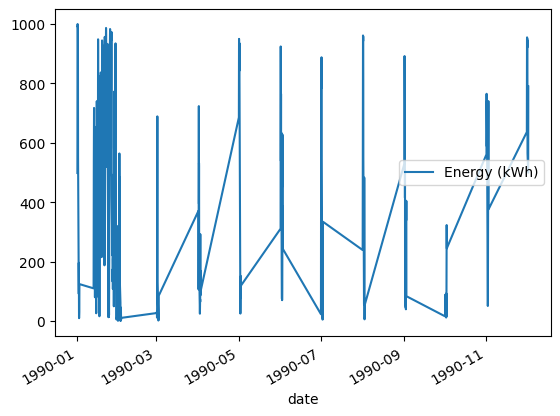

In [6]:
# Graficar la serie de tiempo
forecast.data[:500].plot()

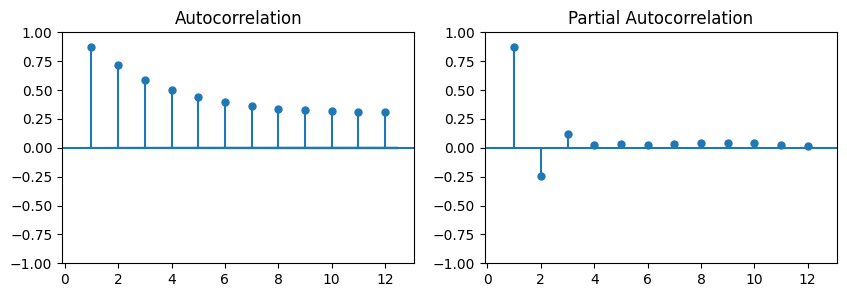

In [8]:
# Graficar ACF y PAC
forecast.plot_acf_pac(kwargs={'lags': 12})

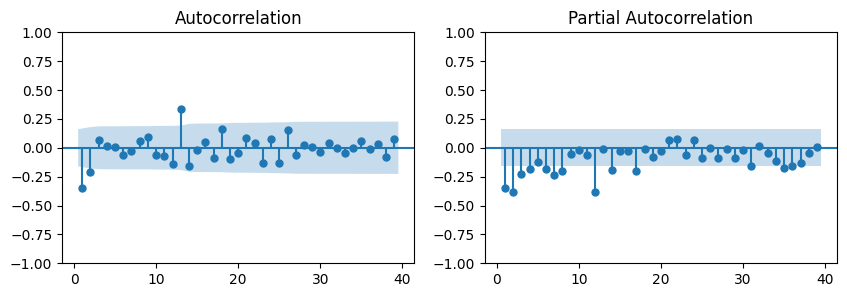

In [32]:
f = plt.figure(figsize=(10,3))

ax1 = f.add_subplot(121)
plot_acf(forecast.data[:150].diff().diff().dropna(), zero=False, ax=ax1, lags=39)

ax2 = f.add_subplot(122)
plot_pacf(forecast.data[:150].diff().diff().dropna(), zero=False, ax=ax2, method='ols',lags=39)

plt.show()

In [11]:
forecast.adf_test()

Results of Dickey-Fuller Test: (diff: 0)
Test Statistic                   -28.225750
p-value                            0.000000
#Lags Used                        67.000000
Number of Observations Used    96932.000000
Critical Value (1%)               -3.430417
Critical Value (5%)               -2.861570
Critical Value (10%)              -2.566786
dtype: float64
Stationary


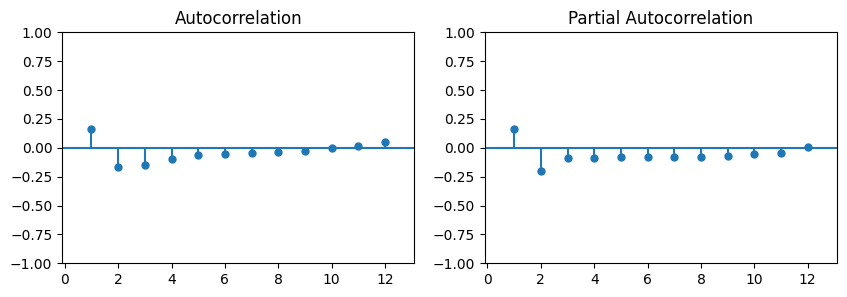

In [9]:
# Primera diferenciación
forecast.plot_acf_pac(diff=1, kwargs={'lags': 12})

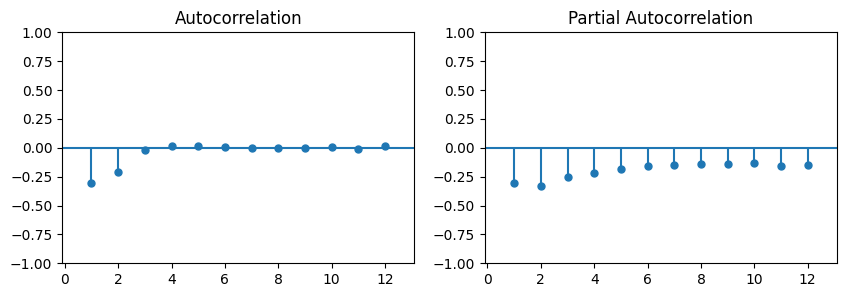

In [10]:
# Segunda diferenciación
forecast.plot_acf_pac(diff=2, kwargs={'lags': 12})

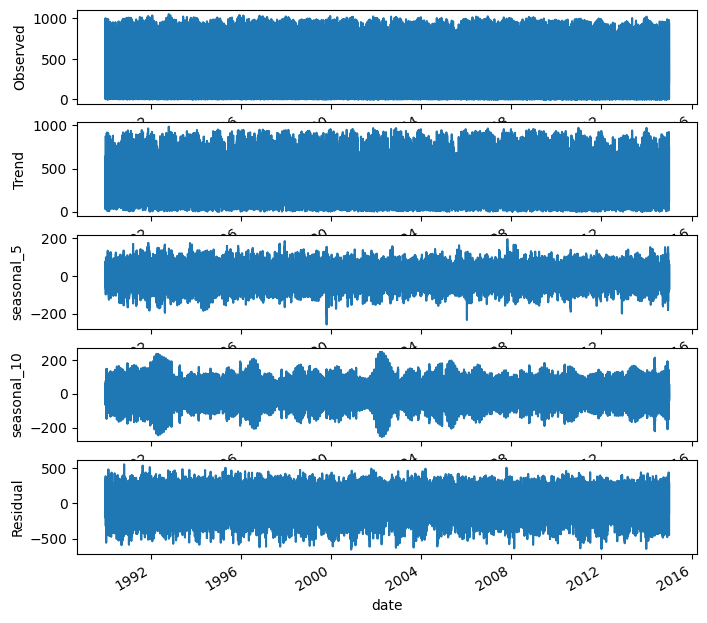

In [16]:
decomposed_series = forecast.seasonal_decomposition((5,10), plot=True)

Código de solución de estudiante 2

In [4]:
# Código de solución de estudiante 2